In [1]:
import boto3
import pandas as pd

# Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'gabrielferreira-data-455-bucket'
bucket = s3.Bucket(bucket_name)

# Defining the file to be read from s3 bucket
file_key = "Real_Estate.csv"

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the csv file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
house_price = house_price.drop(['No'], axis = 1)
house_price.head()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Text(0.5, 1.0, 'House Age Histogram')

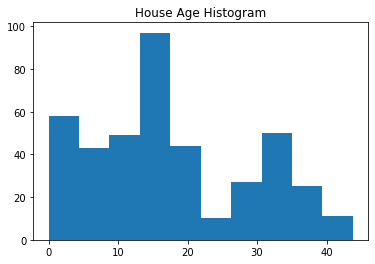

In [3]:
import matplotlib.pyplot as plt

plt.hist(house_price['house_age'])
plt.title('House Age Histogram')

#### The distribution is right-skewed bi-model. There is a high concentration on the age of 15 years old

Text(0.5, 1.0, 'Distance to the nearest MRT station')

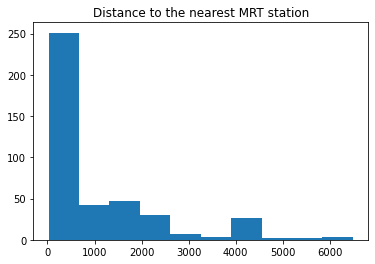

In [4]:
plt.hist(house_price['distance_to_the_nearest_MRT_station'])
plt.title('Distance to the nearest MRT station')

#### The distribution is right-skewed with one pick.

In [5]:
from sklearn.linear_model import LinearRegression

# Defining the input and target variable 
x = house_price[['house_age', 'distance_to_the_nearest_MRT_station',	'number_of_convenience_stores',	'latitude',	'longitude']]
y = house_price['house_price_of_unit_area']

lm_md = LinearRegression().fit(x, y)
lm_md.coef_

array([-2.68916833e-01, -4.25908898e-03,  1.16302048e+00,  2.37767191e+02,
       -7.80545273e+00])

In [6]:
lm_md.intercept_

-4945.5951137444035

#### house age = 5, distance to the nearest MRT station = 500, number of convenience stores = 3, latitude = 24.98, and longitude = 121.49

In [7]:
## Defining the new house characteristics
new_house = [[5, 500, 3, 24.98, 121.49]]

## Predicting the price of unit area
lm_md.predict(new_house)

array([45.55979721])